######  General Churn model 

In [61]:
# The code was removed by DSX for sharing.

In [62]:


body = client_3ee96d0a6d9a4b428f2e5378e7bec329.get_object(Bucket='inschurn-donotdelete-pr-fwv2tei0p8mnfd',Key='churn-set1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customers= pd.read_csv(body)
customers.head()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,...,CREDIT_RATING,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE,CURR_ANN_AMT,CUST_TENURE,CANCEL,NOOFPRODUCTS
0,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,125000.0,42.053388,0.0,1.000000,Single,...,800+,0,0,1,1,NaN,862.963714,7.242300,N,2
1,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,31.805613,0.0,2.000000,Married,...,800+,0,0,1,1,NaN,1007.883812,6.251951,N,2
2,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,43.890486,1.0,6.000000,Married,...,800+,0,0,1,1,NaN,986.928695,10.391239,N,2
3,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,71.052704,0.0,7.000000,Single,...,800+,0,0,1,1,NaN,1025.382552,10.628063,N,2
4,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,38.724162,0.0,6.800524,NaN,...,800+,0,0,0,1,NaN,1011.281898,15.608830,N,2


In [63]:
#merge3.CANCEL.replace(['Y','N'],[1,0],inplace=True)
#merge3.head()

In [64]:
customers.AGE_IN_YEARS=customers.AGE_IN_YEARS.astype(int)
customers.HAS_CHILDREN=customers.HAS_CHILDREN.astype(int)
customers.INCOME=customers.INCOME.astype(int)
customers=customers.drop('CURR_ANN_AMT',1)

In [105]:
customers.dtypes

ZIP5                   float64
LATITUDE               float64
LONGITUDE              float64
ADDRESS_ID             float64
INDIVIDUAL_ID          float64
INCOME                   int64
AGE_IN_YEARS             int64
HAS_CHILDREN             int64
LENGTH_OF_RESIDENCE    float64
MARITAL_STATUS          object
HOME_OWNER_RENTER       object
NUMBER_OF_CHILDREN     float64
EDUCATION               object
HOME_MARKET_VALUE       object
CREDIT_RATING           object
HOME_OWNER               int64
NO_MARITAL_STATUS        int64
COLLEGE_DEGREE           int64
GOOD_CREDIT              int64
ACCT_SUSPD_DATE         object
CUST_TENURE            float64
CANCEL                  object
NOOFPRODUCTS             int64
dtype: object

In [66]:
customers.head(2)

,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,...,HOME_MARKET_VALUE,CREDIT_RATING,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE,CUST_TENURE,CANCEL,NOOFPRODUCTS
0,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,125000,42,0,1.0,Single,...,275000 - 299999,800+,0,0,1,1,NaN,7.242300,N,2
1,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500,31,0,2.0,Married,...,200000 - 224999,800+,0,0,1,1,NaN,6.251951,N,2


In [67]:
print(customers[customers['CANCEL']=='Y'].count())

ZIP5                   15030
LATITUDE               13940
LONGITUDE              13940
ADDRESS_ID             15030
INDIVIDUAL_ID          15030
INCOME                 15030
AGE_IN_YEARS           15030
HAS_CHILDREN           15030
LENGTH_OF_RESIDENCE    15030
MARITAL_STATUS         12174
HOME_OWNER_RENTER      11209
NUMBER_OF_CHILDREN      9565
EDUCATION               8320
HOME_MARKET_VALUE      13510
CREDIT_RATING          14251
HOME_OWNER             15030
NO_MARITAL_STATUS      15030
COLLEGE_DEGREE         15030
GOOD_CREDIT            15030
ACCT_SUSPD_DATE        15030
CUST_TENURE            15030
CANCEL                 15030
NOOFPRODUCTS           15030
dtype: int64


In [68]:
customers_group_by_maritalstatus=customers.groupby('MARITAL_STATUS')
print (customers_group_by_maritalstatus['MARITAL_STATUS'].count())

MARITAL_STATUS
Married    31788
Single     17742
Name: MARITAL_STATUS, dtype: int64


In [69]:
# Married people have cancelled
#merge3.head(20)
#merge3.loc[(merge3['HOME_OWNER']==1) & (merge3['CANCEL']==0)]

#df[df['first_name'].notnull() & (df['nationality'] == "USA")]

In [70]:


# load matplot lib for various plotting
import matplotlib.pyplot as plt
plt.rc("font", size=14)

# we will use the seaborn for visually appealing plots
import seaborn as sns
sns.set()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


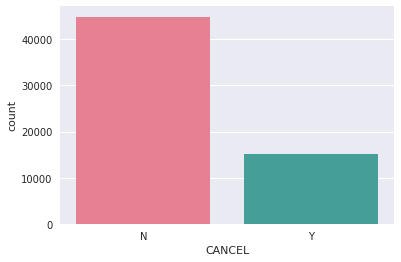

In [71]:
# vISULAIZATION OF NO ON CANCELLATIONS

sns.countplot(x='CANCEL', data=customers, palette='husl')
plt.show()

In [72]:
GROUP_PDTS_CANCEL=customers.groupby(['CANCEL','NOOFPRODUCTS']).count()
GROUP_PDTS_CANCEL

ZIP5  LATITUDE  LONGITUDE  ADDRESS_ID  INDIVIDUAL_ID  \
CANCEL NOOFPRODUCTS                                                          
N      1             35923     33414      33414       35923          35923   
       2              4471      4148       4148        4471           4471   
       3              4511      4218       4218        4511           4511   
Y      1             10484      9737       9737       10484          10484   
       2              2308      2141       2141        2308           2308   
       3              1242      1133       1133        1242           1242   
       4               996       929        929         996            996   

                     INCOME  AGE_IN_YEARS  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
CANCEL NOOFPRODUCTS                                                            
N      1              35923         35923         35923                35923   
       2               4471          4471          4471                 4471   
       3               4511          4511          4511                 4511   
Y      1              10484         10484         10484                10484   
       2               2308          2308          2308                 2308   
       3               1242          1242          1242                 1242   
       4                996           996           996                  996   

                     MARITAL_STATUS     ...       NUMBER_OF_CHILDREN  \
CANCEL NOOFPRODUCTS                     ...                            
N      1                      29848     ...                    23005   
       2                       3743     ...                     2901   
       3                       3765     ...                     2867   
Y      1                       8495     ...                     6677   
       2                       1860     ...                     1459   
       3                       1005     ...                      777   
       4                        814     ...                      652   

                     EDUCATION  HOME_MARKET_VALUE  CREDIT_RATING  HOME_OWNER  \
CANCEL NOOFPRODUCTS                                                            
N      1                 20763              33087          34483       35923   
       2                  2639               4121           4297        4471   
       3                  2631               4137           4316        4511   
Y      1                  5816               9422           9946       10484   
       2                  1261               2077           2182        2308   
       3                   686               1108           1177        1242   
       4                   557                903            946         996   

                     NO_MARITAL_STATUS  COLLEGE_DEGREE  GOOD_CREDIT  \
CANCEL NOOFPRODUCTS                                                   
N      1                         35923           35923        35923   
       2                          4471            4471         4471   
       3                          4511            4511         4511   
Y      1                         10484           10484        10484   
       2                          2308            2308         2308   
       3                          1242            1242         1242   
       4                           996             996          996   

                     ACCT_SUSPD_DATE  CUST_TENURE  
CANCEL NOOFPRODUCTS                                
N      1                           0        35923  
       2                           0         4471  
       3                           0         4511  
Y      1                       10484        10484  
       2                        2308         2308  
       3                        1242         1242  
       4                         996          996  

[7 rows x 21 columns]

In [73]:
customers.groupby('CANCEL').mean()

,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,NUMBER_OF_CHILDREN,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,CUST_TENURE,NOOFPRODUCTS
CANCEL,,,,,,,,,,,,,,,,
N,75003.951609,33.028911,-96.773532,5.213005e+11,2.213014e+11,88668.795635,54.589066,0.442000,6.957544,0.932610,0.745975,0.0,0.344416,0.948959,12.887059,1.300479
Y,75011.571790,33.038421,-96.825192,5.213006e+11,2.213016e+11,101679.264671,52.538723,0.466134,6.234045,1.017355,0.720492,0.0,0.333599,0.939055,7.342869,1.517631


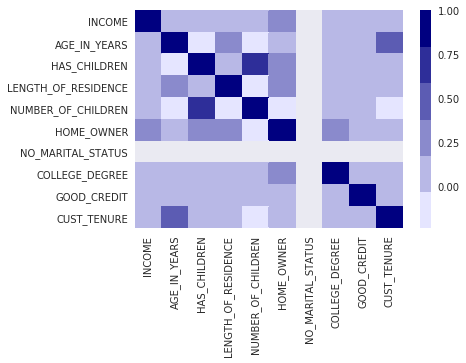

In [74]:
# Find the corelation between inputs

num_cols=['INCOME','AGE_IN_YEARS','HAS_CHILDREN','LENGTH_OF_RESIDENCE','NUMBER_OF_CHILDREN','HOME_OWNER','NO_MARITAL_STATUS','COLLEGE_DEGREE','GOOD_CREDIT','CUST_TENURE']

num_cols_with_y = num_cols + ['CANCEL']

corr = customers[num_cols].corr()

# plot heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap=sns.light_palette("navy"),
           )
plt.show()


In [75]:
from pyspark.sql.types import *

# Prepare data

mySchema = StructType([ StructField("ZIP5", FloatType(), True)\
                       ,StructField("LATITUDE", FloatType(), True)\
                       ,StructField("LONGITUDE", FloatType(), True)\
                       ,StructField("ADDRESS_ID", FloatType(), True)\
                       ,StructField("INDIVIDUAL_ID", FloatType(), True)\
                       ,StructField("INCOME", IntegerType(), True)\
                       ,StructField("AGE_IN_YEARS", IntegerType(), True)\
                       ,StructField("HAS_CHILDREN", IntegerType(), True)\
                       ,StructField("LENGTH_OF_RESIDENCE", FloatType(), True)\
                       ,StructField("MARITAL_STATUS", StringType(), True)\
                       ,StructField("HOME_OWNER_RENTER", StringType(), True)\
                       ,StructField("NUMBER_OF_CHILDREN", FloatType(), True)\
                       ,StructField("EDUCATION", StringType(), True)\
                       ,StructField("HOME_MARKET_VALUE", StringType(), True)\
                       ,StructField("CREDIT_RATING", StringType(), True)\
                       ,StructField("HOME_OWNER", IntegerType(), True)\
                       ,StructField("NO_MARITAL_STATUS", IntegerType(), True)\
                       ,StructField("COLLEGE_DEGREE",IntegerType(), True)\
                       ,StructField("GOOD_CREDIT", IntegerType(), True)\
                       ,StructField("ACCT_SUSPENDED_DATE", StringType(), True)\
                       ,StructField("CUST_TENURE", FloatType(), True)\
                       ,StructField("CANCEL", StringType(), True)\
                       ,StructField("NOOFPRODUCTS", IntegerType(), True)])
                     

cust_sp=sqlContext.createDataFrame(customers,mySchema)
splitted_data=cust_sp.randomSplit([0.8,0.18,0.02],24)
train_data=splitted_data[0]
test_data=splitted_data[1]
predict_data=splitted_data[2]


In [76]:
train_data.count()

47890

In [87]:
#Build models
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorIndexer, IndexToString
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier


# Prepare string variables so that they can be used by the decision tree algorithm
# StringIndexer encodes a string column of labels to a column of label indices
SI1 = StringIndexer(inputCol='MARITAL_STATUS', outputCol='MARITAL_STATUS_Encoded')
SI2 = StringIndexer(inputCol='HOME_OWNER_RENTER',outputCol='HOME_OWNER_RENTER_Encoded')
SI3 = StringIndexer(inputCol='EDUCATION',outputCol='EDUCATION_Encoded')
SI4 = StringIndexer(inputCol='HOME_MARKET_VALUE',outputCol='HOME_MARKET_VALUE_Encoded')
SI5 = StringIndexer(inputCol='CREDIT_RATING',outputCol='CREDIT_RATING_Encoded')
SI6 = StringIndexer(inputCol='HOME_OWNER',outputCol='HOME_OWNER_Encoded')
SI7 = StringIndexer(inputCol='NO_MARITAL_STATUS',outputCol='NO_MARITAL_STATUS_Encoded')
SI8 = StringIndexer(inputCol='COLLEGE_DEGREE',outputCol='COLLEGE_DEGREE_Encoded')
SI9 = StringIndexer(inputCol='GOOD_CREDIT',outputCol='GOOD_CREDIT_Encoded')


E1 = OneHotEncoder(inputCol='MARITAL_STATUS_Encoded', outputCol='MARITAL_STATUS_HotEncoded')
E2 = OneHotEncoder(inputCol='HOME_OWNER_RENTER_Encoded', outputCol='HOME_OWNER_RENTER_HotEncoded')
E3 = OneHotEncoder(inputCol='EDUCATION_Encoded', outputCol='EDUCATION_HotEncoded')
E4 = OneHotEncoder(inputCol='HOME_MARKET_VALUE_Encoded', outputCol='HOME_MARKET_VALUE_HotEncoded')
E5 = OneHotEncoder(inputCol='CREDIT_RATING_Encoded', outputCol='CREDIT_RATING_HotEncoded')
E6 = OneHotEncoder(inputCol='HOME_OWNER', outputCol='HOME_OWNER_HotEncoded')
E7 = OneHotEncoder(inputCol='NO_MARITAL_STATUS_Encoded', outputCol='NO_MARITAL_STATUS_HotEncoded')
E8 = OneHotEncoder(inputCol='COLLEGE_DEGREE', outputCol='COLLEGE_DEGREE_HotEncoded')
E9 = OneHotEncoder(inputCol='GOOD_CREDIT', outputCol='GOOD_CREDIT_HotEncoded')

labelIndexer = StringIndexer(inputCol='CANCEL', outputCol='label').fit(train_data)

# Pipelines API requires that input variables are passed in  a vector

assembler = VectorAssembler(inputCols=["MARITAL_STATUS_Encoded","HOME_OWNER_RENTER_Encoded","EDUCATION_Encoded","HOME_MARKET_VALUE_Encoded","CREDIT_RATING_Encoded","HOME_OWNER_Encoded","COLLEGE_DEGREE_Encoded"
                                      ,"NO_MARITAL_STATUS_Encoded","GOOD_CREDIT_Encoded","INCOME","AGE_IN_YEARS","HAS_CHILDREN","LENGTH_OF_RESIDENCE","NOOFPRODUCTS","CUST_TENURE"], outputCol="features")

In [88]:
# instantiate the algorithm, take the default settings
rf=RandomForestClassifier(labelCol="label", featuresCol="features")
#lr=LogisticRegression(labelCol="label", featuresCol="features",maxIter=10)
dt=DecisionTreeClassifier(labelCol="label", featuresCol="features")
#gbt=GBTClassifier(labelCol="label", featuresCol="features",maxIter=10)
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

pipeline_rf = Pipeline(stages=[SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,SI9, labelIndexer, assembler, rf,labelConverter])

In [89]:
model = pipeline_rf.fit(train_data)

In [90]:
results = model.transform(test_data)
#results=results.select(results["ADDRESS_ID"],results["INDIVIDUAL_ID"],results["CANCEL"],results["label"],results['ACCT_SUSPENDED_DATE'],results["prediction"],results["predictedLabel"],results["probability"])
results.select('INDIVIDUAL_ID','AGE_IN_YEARS','CANCEL','label','prediction','predictedLabel','probability').show(10)
#results.toPandas().head(10)

+-------------+------------+------+-----+----------+--------------+--------------------+
|INDIVIDUAL_ID|AGE_IN_YEARS|CANCEL|label|prediction|predictedLabel|         probability|
+-------------+------------+------+-----+----------+--------------+--------------------+
|2.21303063E11|          54|     N|  0.0|       1.0|             Y|[0.38275192550137...|
|2.21301866E11|          37|     N|  0.0|       0.0|             N|[0.82157246992126...|
|2.21301588E11|          97|     N|  0.0|       0.0|             N|[0.85433485213489...|
|2.21303292E11|          55|     N|  0.0|       0.0|             N|[0.79551348721713...|
|2.21300605E11|          35|     N|  0.0|       0.0|             N|[0.79504172950562...|
|2.21300605E11|          54|     N|  0.0|       0.0|             N|[0.84847176250192...|
|2.21300605E11|          33|     N|  0.0|       0.0|             N|[0.84386480976585...|
|2.21300605E11|          37|     N|  0.0|       1.0|             Y|[0.49763718548199...|
|2.21300605E11|      

###### Evaluation of model

In [91]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print(accuracy)
print("Test Error = %g " % (1.0 - accuracy))

0.8215828660722493
Test Error = 0.178417 


In [60]:
# The code was removed by DSX for sharing.

{'asset_id': 'cf9549e1-5d87-48b3-b0c0-4e178a67b8ca',
 'bucket_name': 'inschurn-donotdelete-pr-fwv2tei0p8mnfd',
 'file_name': 'CHURN_TESTS_RESULTS.csv',
 'message': 'File CHURN_TESTS_RESULTS.csv has been written successfully to the associated OS'}

In [ ]:
print 'Precision model1 = {:.2f}.'.format(results.filter(results.label == results.prediction).count() / float(results.count()))

###### Persist Model

In [ ]:
# Import client clibraries
from repository_v3.mlrepositoryclient import MLRepositoryClient
from repository_v3.mlrepositoryartifact import MLRepositoryArtifact
from repository.mlrepository import MetaProps

#WML Credentials -Authenticate to WML on bluemix, provide authentication info
wml_credentials = {
                   "url": "https://ibm-watson-ml.mybluemix.net",
                  "access_key": "Ev+K+YUYEtMFYKuRvNpn89NK+zfiocQ1jvmKECfKAWvfDd+2pOQHG5zjbBXQ3HMfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
                  "username": "e3c82319-6c25-4aea-bfce-07330f9d6f24",
                   "password": "0d8d6869-b7ac-4f3f-bb7b-5a8269047071",
                    "instance_id": "4aaadd78-04fb-41f7-ba4f-ee270d6468d1"
                    }


In [ ]:
ml_repository_client = MLRepositoryClient(wml_credentials['url'])
ml_repository_client.authorize(wml_credentials['username'], wml_credentials['password'])

In [ ]:
pipeline_artifact = MLRepositoryArtifact(pipeline_rf, name="pipeline")
model_artifact = MLRepositoryArtifact(model, training_data=train_data, name="DSX lab Customer Retention Model", pipeline_artifact=pipeline_artifact)

#Tip: The MLRepositoryArtifact method expects a trained model object, training data, and a model name. 
#(It is this model name that is displayed by the Watson Machine Learning service).

##### Save pipeline and model

In [ ]:
#In this subsection you will learn how to save pipeline and model artifacts to your Watson Machine Learning instance.

saved_model = ml_repository_client.models.save(model_artifact)


In [ ]:


saved_model.meta.available_props()



###### Load model

In [ ]:
loadedModelArtifact=ml_repository_client.models.get(saved_model.uid)
print(saved_model.uid)
print(loadedModelArtifact.name)

###### Deploy ans score in cloud

In [ ]:
# Write test data to .csv
wirteCSV=test_data.toPandas()
writeCSV.to_csv('../datasets/test_Eval.csv',sep=',',index=False)

In [ ]:
# bELOW CELLS FOR SKLEARN

In [146]:
# for preprocessing
from sklearn import preprocessing

# for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# for creating pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

# for cross validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# for various metrics and reporting
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# feature selection
from sklearn.feature_selection import SelectFromModel

In [21]:
# for cross validation [Using sklearn instead of above cell spark df as it hangs]
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# 10 percent of dataset is used for test and 90 percent for model training
train_data, test_data = train_test_split(merge3, test_size=0.1, random_state=0)

#
print("Size of the training dataset = ", train_data.shape)
print("Size of the testing dataset = ", test_data.shape)
print("\nSample of the training dataset \n")
train_data.head()



/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Size of the training dataset =  (1901299, 23)
Size of the testing dataset =  (211256, 23)

Sample of the training dataset 



,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,...,HOME_MARKET_VALUE,CREDIT_RATING,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE,CURR_ANN_AMT,CUST_TENURE,CANCEL
1468350,76018.0,32.652577,-97.083717,5.213012e+11,2.213029e+11,70000.000000,69.472964,1.0,13.0,Married,...,50000 - 74999,750 - 799,1,0,0,1,NaN,946.110997,7.734086,0
1264413,75248.0,32.973764,-96.772581,5.213009e+11,2.213024e+11,80372.176475,55.444002,0.0,4.0,NaN,...,225000 - 249999,800+,0,0,1,1,NaN,1125.236065,6.600000,0
554132,75075.0,NaN,NaN,5.213013e+11,2.213030e+11,70000.000000,67.805613,0.0,4.0,Single,...,150000 - 174999,800+,1,0,0,1,NaN,735.533182,7.483984,0
536557,75071.0,33.236732,-96.640817,5.213001e+11,2.213001e+11,87500.000000,44.807666,1.0,4.0,Single,...,250000 - 274999,800+,1,0,1,1,NaN,813.723521,6.723819,0
458496,75067.0,33.013817,-97.030417,5.213004e+11,2.213010e+11,62500.000000,53.724846,1.0,1.0,Married,...,200000 - 224999,NaN,0,0,1,0,NaN,1029.061253,0.358125,0


In [147]:
merge3.corr()["CANCEL"]

ZIP5                   0.000479
LATITUDE               0.000675
LONGITUDE             -0.000325
ADDRESS_ID            -0.002714
INDIVIDUAL_ID         -0.002360
INCOME                -0.006378
AGE_IN_YEARS          -0.051095
HAS_CHILDREN           0.010783
LENGTH_OF_RESIDENCE   -0.035081
NUMBER_OF_CHILDREN     0.023198
HOME_OWNER            -0.018844
NO_MARITAL_STATUS           NaN
COLLEGE_DEGREE        -0.020519
GOOD_CREDIT           -0.008227
CURR_ANN_AMT           0.021931
CUST_TENURE           -0.158837
CANCEL                 1.000000
Name: CANCEL, dtype: float64

In [159]:
merge3.dtypes

ZIP5                   float64
LATITUDE               float64
LONGITUDE              float64
ADDRESS_ID             float64
INDIVIDUAL_ID          float64
INCOME                 float64
AGE_IN_YEARS           float64
HAS_CHILDREN           float64
LENGTH_OF_RESIDENCE    float64
MARITAL_STATUS          object
HOME_OWNER_RENTER       object
NUMBER_OF_CHILDREN     float64
EDUCATION               object
HOME_MARKET_VALUE       object
CREDIT_RATING           object
HOME_OWNER               int64
NO_MARITAL_STATUS        int64
COLLEGE_DEGREE           int64
GOOD_CREDIT              int64
ACCT_SUSPD_DATE         object
CURR_ANN_AMT           float64
CUST_TENURE            float64
CANCEL                   int64
dtype: object

In [162]:
columns=merge3.columns.tolist()
columns = [c for c in columns if c not in ["ACCT_SUSPD_DATE","CREDIT_RATING","HOME_MARKET_VALUE","MARITAL_STATUS","EDUCATION","HOME_OWNER_RENTER","LATITUDE","LONGITUDE"]]

target="CANCEL"
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train_data[columns], train_data[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').